# Utilization of Vehicles

Analysing the usage of smart mobility vehicles.

## Importing the Data

In [1]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

#Before answering any questions, some initial data cleaning might be required - Removing empty rows or rows missing essential data.

socrata_domain = 'data.austintexas.gov'
socrata_dataset_identifier = '7d8e-dm7r'
client = Socrata(socrata_domain, app_token="dpeNV73iYuSEj7yICGIDoG4S9")


results = client.get("7d8e-dm7r", limit=3000000)
df = pd.DataFrame.from_records(results)

## Cleaning the Data

#### Before starting, this specific exercise needs a different dataframe which responds to 'time' methods

In [2]:
# changing the name of the week with day
df.rename(columns = {'day_of_week':'day'}, inplace = True)

In [3]:
# Change columns names. Replace spaces by underscores and upper case letters by lower case letters
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)

In [4]:
#checking null values
df.isnull().sum().any()

True

In [6]:
# replace Unknown with n.a
df.replace('Unknown',np.nan, inplace=True)

In [7]:
df.isnull().sum().any()

True

In [8]:
#start time us central and end time us contain null
# Drop unnecessary columns.
df = df.drop('start_time_us_central', axis=1)

In [9]:
df = df.drop('end_time_us_central', axis=1)

### filtering year 2021

In [10]:
df = df[(df['year'] == '2021')]
df.head(10)

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,2184,4254.483964627391,2021-11-02T00:45:00.000,2021-11-02T01:15:00.000,2021-11-03T03:16:12.000,11,1,1,9,9,2021,48453001100,48453001100
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705,2670.868099468422,2021-11-02T01:30:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:12.000,11,1,1,3,9,2021,48453000902,48453001100
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189,258.93874414083393,2021-11-02T01:15:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:10.000,11,1,1,1,1,2021,48453001100,48453001100
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203,354.08819384429376,2021-11-02T01:30:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:11.000,11,1,1,1,9,2021,48453001100,48453001100
10,22724db9-d1f1-4335-98f5-e401181b9776,f933c244-afac-4919-9c61-d9cdbffc3b64,scooter,891,2562.1638553253415,2021-12-19T00:30:00.000,2021-12-19T00:45:00.000,2021-12-20T01:16:28.000,12,0,6,9,9,2021,48453001100,48453001100
11,b3a746f2-3b0f-438f-82c0-4e3a16e1fd0b,feaed8e5-8007-4db8-8e97-76256de28c12,scooter,353,954,2021-12-19T00:15:00.000,2021-12-19T00:15:00.000,2021-12-20T01:16:28.000,12,0,6,9,9,2021,48453001100,48453001100
12,44c95aae-7fff-409f-9052-e372d81ca2e2,81e6c570-65ee-4757-a3dd-601aac9b6c70,scooter,729,2643,2021-12-19T00:30:00.000,2021-12-19T00:45:00.000,2021-12-20T01:17:09.000,12,0,6,1,9,2021,48453001100,48453001305
13,16816f63-24ae-4363-bded-29ea8451c9e2,ec827a35-8f16-4741-9440-187954961667,scooter,1802,1938,2021-12-19T00:15:00.000,2021-12-19T00:45:00.000,2021-12-20T01:17:10.000,12,0,6,9,9,2021,48453001305,48453001100
14,98b7a44a-6118-497c-9316-f0661afb910f,d19185cb-0f2a-4af7-bb35-b77240158125,scooter,98,295,2021-12-19T00:45:00.000,2021-12-19T00:45:00.000,2021-12-20T01:16:12.000,12,0,6,9,3,2021,48453001100,48453000902
15,bbaf92f4-f430-443a-8c93-c6e4fe43e878,85d07f7c-d3e4-4969-8bfc-dfe5f81e5b54,scooter,74,219,2021-12-19T00:15:00.000,2021-12-19T00:15:00.000,2021-12-20T01:16:12.000,12,0,6,9,9,2021,48453001100,48453001100


In [11]:
#we need to change the type of; day, month, and year into integer
df["year"] = df["year"].astype('int')
df["day"] = df["day"].astype('int')
df["hour"] = df["hour"].astype('int')
df["month"] = df["month"].astype('int')

### I decided to create a column 'date' in which put all the information related to time and date of travels so I would delete unecessary columns

In [12]:
df['date'] = df.apply(lambda _: '', axis=1)

In [13]:
#changing the format into datetime
df["date"] = pd.to_datetime(df.date, errors='coerce', format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756265 entries, 0 to 2773049
Data columns (total 17 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   trip_id                 object        
 1   device_id               object        
 2   vehicle_type            object        
 3   trip_duration           object        
 4   trip_distance           object        
 5   start_time              object        
 6   end_time                object        
 7   modified_date           object        
 8   month                   int64         
 9   hour                    int64         
 10  day                     int64         
 11  council_district_start  object        
 12  council_district_end    object        
 13  year                    int64         
 14  census_geoid_start      object        
 15  census_geoid_end        object        
 16  date                    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(12)
mem

In [14]:
df["date"] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

In [15]:
df.head()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end,date
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,2184,4254.483964627391,2021-11-02T00:45:00.000,2021-11-02T01:15:00.000,2021-11-03T03:16:12.000,11,1,1,9,9,2021,48453001100,48453001100,2021-11-01
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705,2670.868099468422,2021-11-02T01:30:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:12.000,11,1,1,3,9,2021,48453000902,48453001100,2021-11-01
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189,258.93874414083393,2021-11-02T01:15:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:10.000,11,1,1,1,1,2021,48453001100,48453001100,2021-11-01
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203,354.08819384429376,2021-11-02T01:30:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:11.000,11,1,1,1,9,2021,48453001100,48453001100,2021-11-01
10,22724db9-d1f1-4335-98f5-e401181b9776,f933c244-afac-4919-9c61-d9cdbffc3b64,scooter,891,2562.1638553253415,2021-12-19T00:30:00.000,2021-12-19T00:45:00.000,2021-12-20T01:16:28.000,12,0,6,9,9,2021,48453001100,48453001100,2021-12-06


In [16]:
#We drop the column we don't need
df = df.drop('start_time', axis=1)
df = df.drop('end_time', axis=1)
df = df.drop('modified_date', axis=1)
df = df.drop('month', axis=1)
df = df.drop('year', axis=1)
df = df.drop('day', axis=1)
df = df.drop('council_district_start', axis=1)
df = df.drop('council_district_end', axis=1)

In [17]:
# Columns after dropping.
df.columns

Index(['trip_id', 'device_id', 'vehicle_type', 'trip_duration',
       'trip_distance', 'hour', 'census_geoid_start', 'census_geoid_end',
       'date'],
      dtype='object')

In [18]:
import calendar
# Number of trips per month
trips_month = df.groupby([df['date'].dt.year, df['date'].dt.month]).count().date

trips_month

date    date
2021.0  1.0     120315
        2.0      86537
        3.0     257937
        4.0     277574
        5.0     348653
        6.0     342466
        7.0     382068
        8.0     331677
        9.0     209766
        10.0     20316
        11.0     26974
        12.0     23353
Name: date, dtype: int64

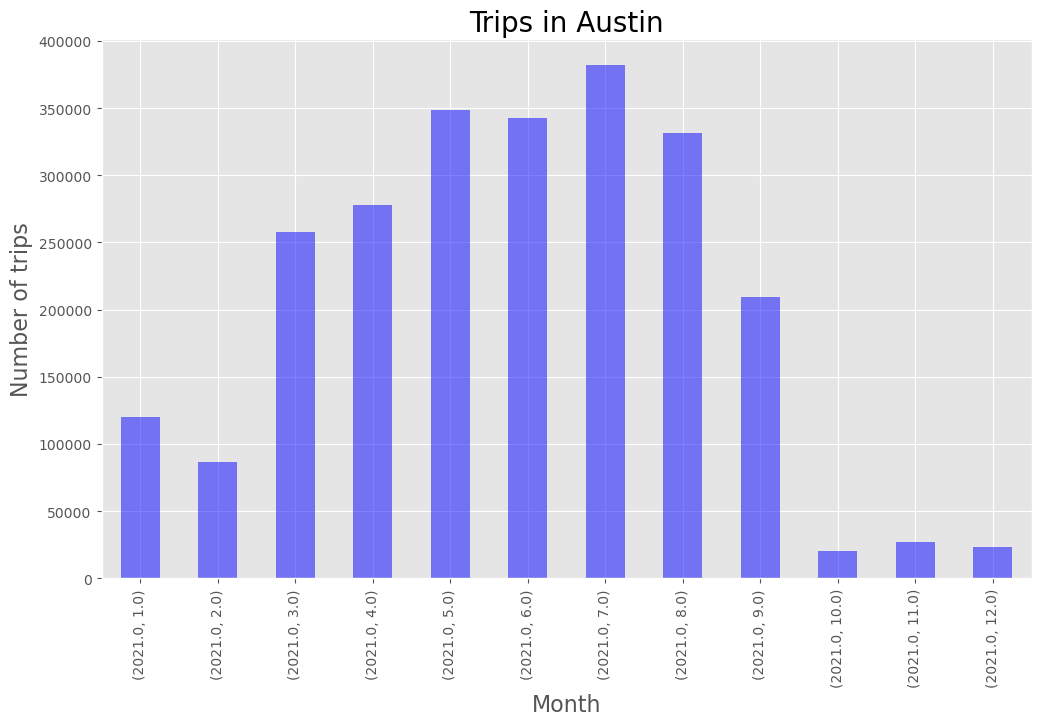

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# plot trips per month
trips_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Trips in Austin', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of trips',fontsize=16);

In [20]:
df.size

24806385

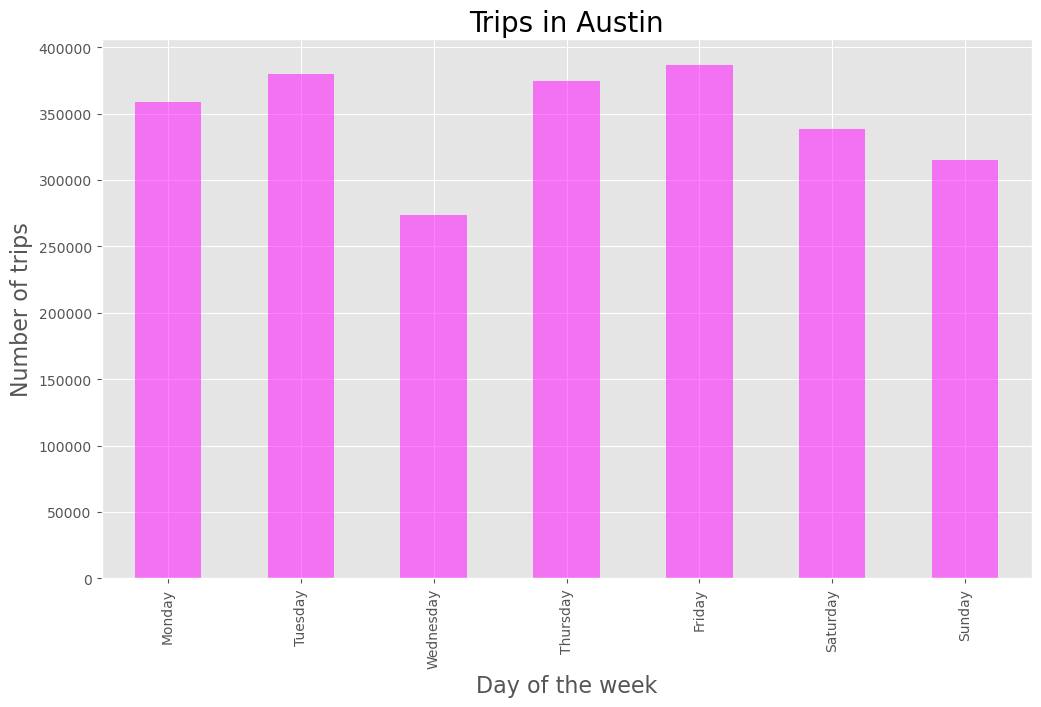

In [21]:
trips_day = df.groupby(df['date'].dt.dayofweek).count().date

# Replace the day integers by day names.
trips_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
trips_day.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Trips in Austin', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of trips',fontsize=16);

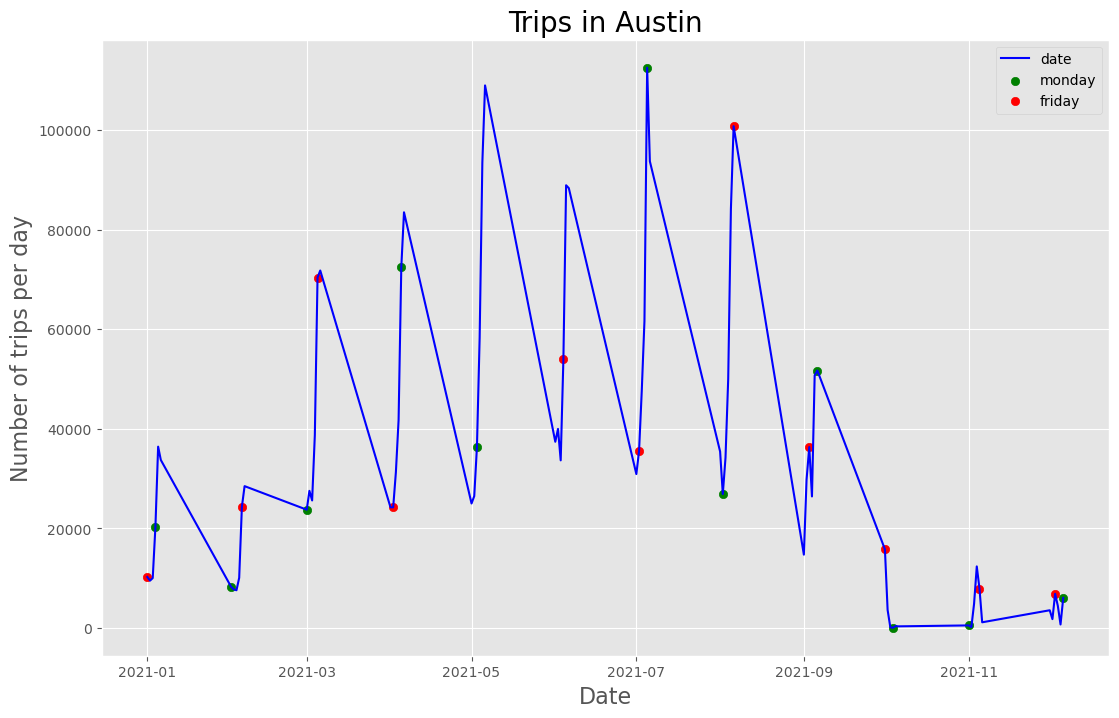

In [22]:
trips = df.groupby(df['date'].dt.date).count().date

trips.plot(figsize=(13,8), color='blue')

# monday accidents
mondays = df.groupby(df[df['date'].dt.dayofweek==0].date.dt.date).count().date
plt.scatter(mondays.index, mondays, color='green', label='monday')

# friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday, color='red', label='friday')

# Title, x label and y label
plt.title('Trips in Austin', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of trips per day',fontsize=16);
plt.legend()

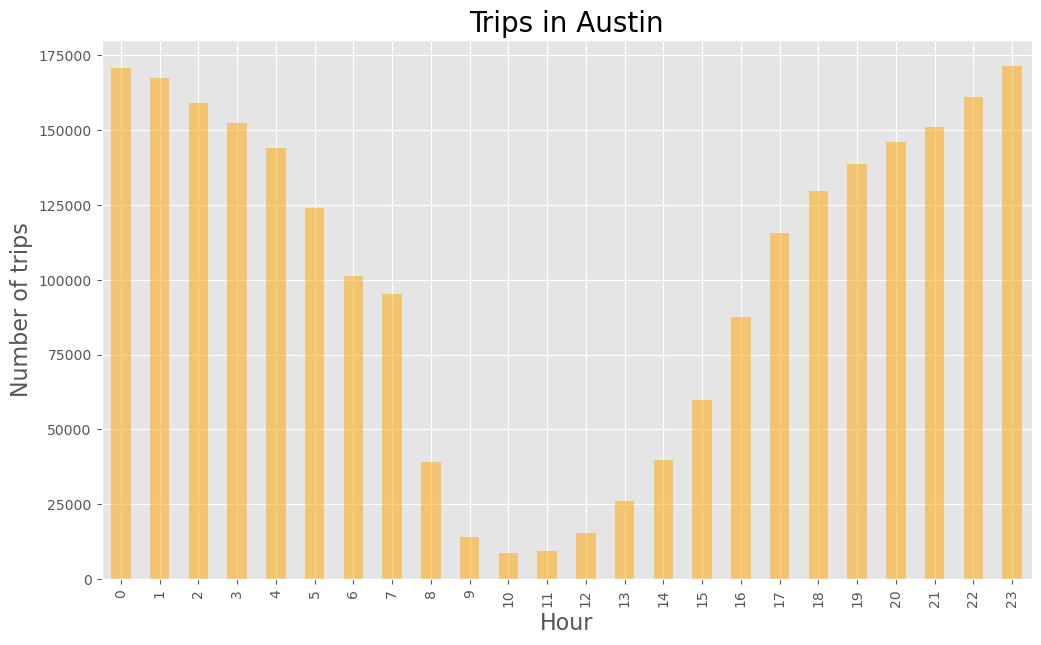

In [23]:
# Number of trips per hour
trips_hour = df.groupby(df['hour']).count().date

# plot trips per hour
trips_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Trips in Austin', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of trips',fontsize=16);

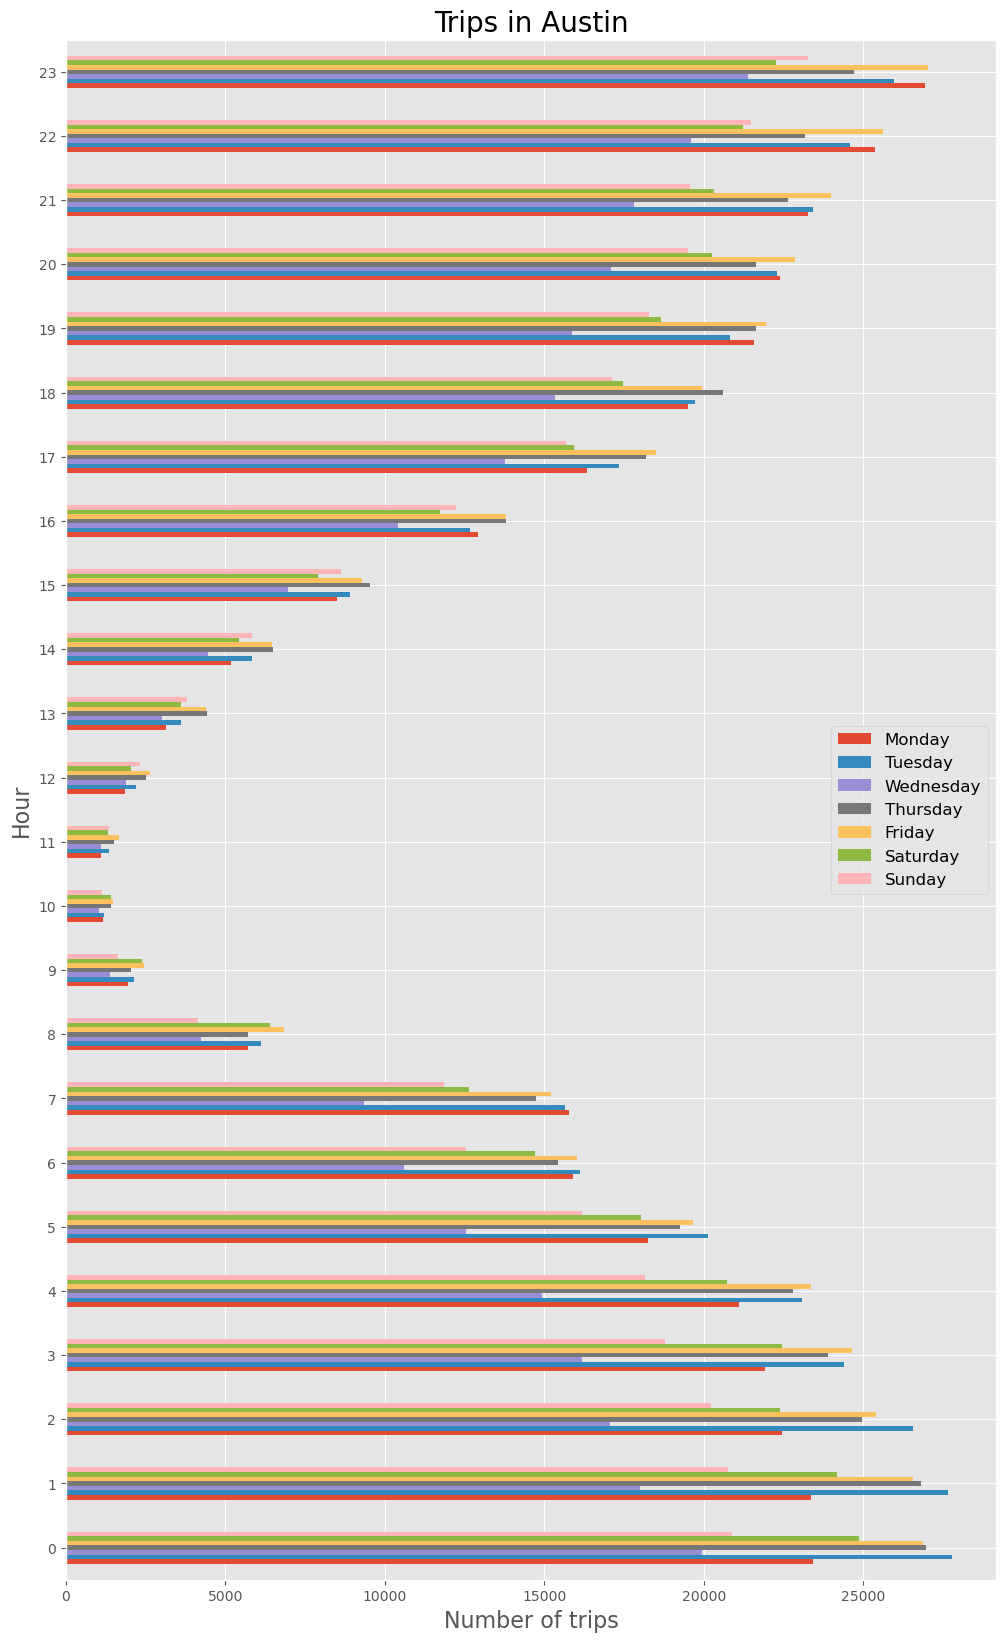

In [24]:
trips_hour_day = df.groupby([df['hour'],df['date'].dt.dayofweek.rename('day')]).count().date

trips_hour_day.unstack().plot(kind='barh', figsize=(12,20))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=12)
plt.title('Trips in Austin',fontsize=20)
plt.xlabel('Number of trips',fontsize=16)
plt.ylabel('Hour',fontsize=16);

## Trip duration mean and median

In [26]:
df.describe()

,hour
count,2.756265e+06
mean,1.134500e+01
std,8.374988e+00
min,0.000000e+00
25%,3.000000e+00
50%,1.200000e+01
75%,2.000000e+01
max,2.300000e+01


In [27]:
#Grouping based on day_of_week
date_groups = (df.groupby(df["date"].dt.dayofweek).count().date
   .sort_values(ascending=True) 
   .reset_index(name='count'))
date_groups

,date,count
0,2.0,273919
1,6.0,315374
2,5.0,338331
3,0.0,359060
4,3.0,374865
5,1.0,379493
6,4.0,386594


In [34]:
mean_days = df.groupby(df["date"].dt.dayofweek)["trip_duration"].mean().sort_values(ascending=True).reset_index(name='Mean')

mean_days

,date,Mean
0,0.0,inf
1,1.0,inf
2,2.0,inf
3,3.0,inf
4,4.0,inf
5,5.0,inf
6,6.0,inf


In [29]:
median_days = df.groupby(df["date"].dt.dayofweek)["trip_duration"].median().sort_values(ascending=True).reset_index(name='Median')

median_days

,date,Median
0,4.0,457.0
1,2.0,460.0
2,5.0,462.0
3,6.0,464.0
4,3.0,469.0
5,0.0,477.0
6,1.0,482.0


## Device Id Analysis

### Finding duplicated vehicle Ids

In [30]:
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')

In [31]:
df['quarter'] = df['date'].dt.quarter
df.head()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,hour,census_geoid_start,census_geoid_end,date,quarter
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,2184,4254.483964627391,1,48453001100,48453001100,2021-11-01,4.0
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705,2670.868099468422,1,48453000902,48453001100,2021-11-01,4.0
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189,258.93874414083393,1,48453001100,48453001100,2021-11-01,4.0
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203,354.08819384429376,1,48453001100,48453001100,2021-11-01,4.0
10,22724db9-d1f1-4335-98f5-e401181b9776,f933c244-afac-4919-9c61-d9cdbffc3b64,scooter,891,2562.1638553253415,0,48453001100,48453001100,2021-12-06,4.0


In [32]:
id_matrix = (
    df.assign(count=1)
    .pivot_table(index="quarter", columns="device_id",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype(int)
).sort_values("quarter")

id_matrix

device_id,0004ddfb-f69b-4e07-93a0-8581521da1c9,0006d72d-880a-40c4-91f1-98e2456e3956,000e12c8-680e-4548-b913-ed0923184b3f,000ed98a-6b35-427a-b523-8e6d1c8efeb2,0010f989-4ff7-4cf0-a659-2b9e0a8e41ec,00115020-b706-41c8-a618-52316e2f416b,0012fce4-c44f-4ed9-b588-df502ac8923e,0015b896-524f-4d5a-ac09-52599740291d,0019e5a9-9f62-4523-be0f-5f57325a5bec,0022d4a3-aa73-4f75-b85f-d773aaed9d0f,...,ffce1df8-ce2f-46ff-aaf4-28a4de10714a,ffdc0179-3ae8-4f7a-bbf6-26d9f8b8d0e7,ffde741a-4a48-4f28-87c1-0b77640fd3d1,ffe02f7c-5753-4a14-b85c-17094862f1cd,ffeaa2b2-39bc-4771-a147-b846745bc423,ffeb31dc-f4d6-43ab-aa22-f103231767d3,ffeb55e6-2130-49ad-8a21-34fd2cce1a10,ffebfa82-e559-41fb-9b3d-f1439bab784f,fff5545e-33e2-485e-af03-3c2b3e0abe0e,fffccd9c-8499-44d3-857a-648de2010b1f
quarter,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,26,0,0,17,0,...,0,0,0,0,0,0,62,0,6,0
2.0,0,0,0,0,49,0,0,0,132,0,...,0,0,0,0,34,0,130,0,0,0
3.0,1,0,0,4,90,0,0,1,1,0,...,4,1,2,2,48,1,123,21,0,3
4.0,9,2,2,7,0,0,20,2,0,1,...,2,3,16,11,0,0,0,0,0,7
